In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Create fake loan applicant data
data = {
    'Age': [25, 45, 35, 23, 52, 40, 60, 30, 29, 48],
    'Income': [50000, 100000, 75000, 30000, 120000, 85000, 45000, 60000, 52000, 110000],
    'CreditScore': [680, 720, 710, 600, 740, 690, 610, 650, 630, 700],
    'YearsEmployed': [1, 10, 5, 0, 15, 8, 2, 4, 3, 12],
    'LoanAmount': [20000, 30000, 25000, 15000, 35000, 28000, 22000, 24000, 21000, 32000],
    'Approved': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1]  # Target label (0 = Denied, 1 = Approved)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# View first few rows
df.head()


,Age,Income,CreditScore,YearsEmployed,LoanAmount,Approved
0,25,50000,680,1,20000,0
1,45,100000,720,10,30000,1
2,35,75000,710,5,25000,1
3,23,30000,600,0,15000,0
4,52,120000,740,15,35000,1


In [10]:
# Check column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            10 non-null     int64
 1   Income         10 non-null     int64
 2   CreditScore    10 non-null     int64
 3   YearsEmployed  10 non-null     int64
 4   LoanAmount     10 non-null     int64
 5   Approved       10 non-null     int64
dtypes: int64(6)
memory usage: 612.0 bytes
None


In [12]:
# Summary statistics
print(df.describe())

             Age         Income  CreditScore  YearsEmployed   LoanAmount  \
count  10.000000      10.000000    10.000000      10.000000     10.00000   
mean   38.700000   72700.000000   673.000000       6.000000  25200.00000   
std    12.365274   30232.616677    48.085572       5.033223   6088.24003   
min    23.000000   30000.000000   600.000000       0.000000  15000.00000   
25%    29.250000   50500.000000   635.000000       2.250000  21250.00000   
50%    37.500000   67500.000000   685.000000       4.500000  24500.00000   
75%    47.250000   96250.000000   707.500000       9.500000  29500.00000   
max    60.000000  120000.000000   740.000000      15.000000  35000.00000   

        Approved  
count  10.000000  
mean    0.600000  
std     0.516398  
min     0.000000  
25%     0.000000  
50%     1.000000  
75%     1.000000  
max     1.000000  


In [14]:
# Check for missing values
print(df.isnull().sum())

Age              0
Income           0
CreditScore      0
YearsEmployed    0
LoanAmount       0
Approved         0
dtype: int64


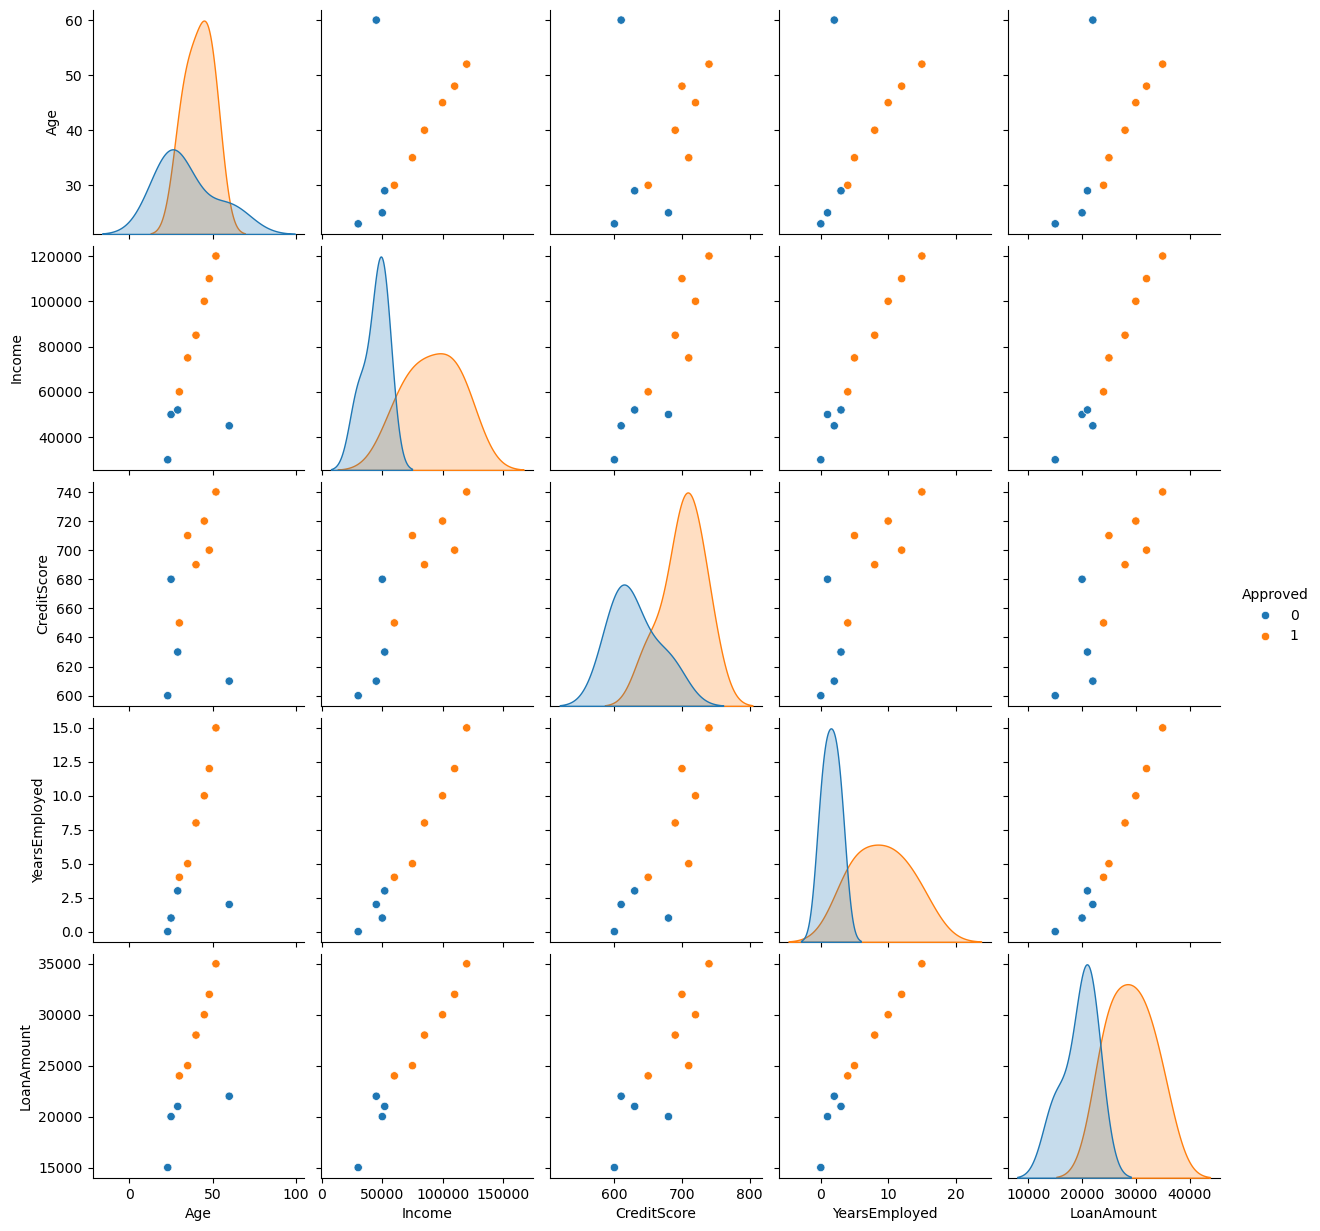

In [16]:
# Visuialize pairplots (distribution and relationships)
sns.pairplot(df, hue='Approved')
plt.show()

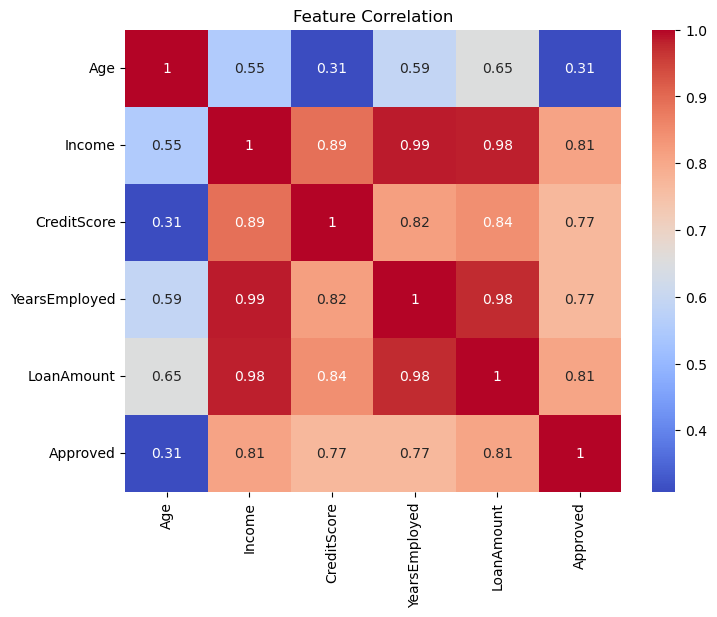

In [18]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [20]:
# 1. Split features and labels
x = df.drop('Approved', axis=1) # All columns except 'Approved'
y = df['Approved'] # The target column

# 2. Split into training and testing data (80% train / 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Check shapes to confirm
print("Training samples:", x_train.shape[0])
print("Testing samples:", x_test.shape[0])

Training samples: 8
Testing samples: 2


In [24]:
# Create the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model (fit to training data)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

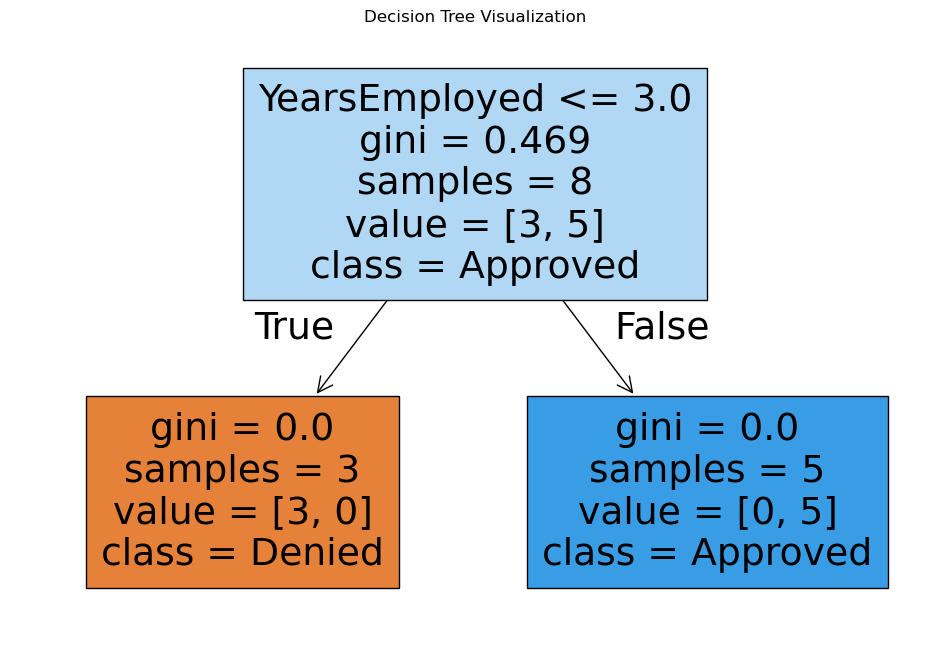

In [ ]:
# Visualize the actual tree structure to show how the model makes decisions
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=x.columns, class_names=['Denied', 'Approved'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [34]:
# Make predictions on test set
y_pred = model.predict(x_test)

# Confusion Matrix
print("COnfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



COnfusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [38]:
# Create a new applicant's data
new_applicant = pd.DataFrame({
    'Age': [33],
    'Income': [75000],
    'CreditScore': [705],
    'YearsEmployed': [5],
    'LoanAmount': [25000]
})

# Make prediction
prediction = model.predict(new_applicant)

# Output result
print("Loan Approved?" , "✅ Yes" if prediction[0] == 1 else "❌ No")

Loan Approved? ✅ Yes


In [40]:
# Applicant likely to be denied
risky_applicant = pd.DataFrame({
    'Age': [22],
    'Income': [32000],
    'CreditScore': [615],
    'YearsEmployed': [0],
    'LoanAmount': [22000]
})

# Make prediction
prediction = model.predict(risky_applicant)

# Output result
print("Loan Approved?", "✅ Yes" if prediction[0] == 1 else "❌ No")


Loan Approved? ❌ No
